# **2D Convolution**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Height: 3264, Width: 4928, RGB: 3


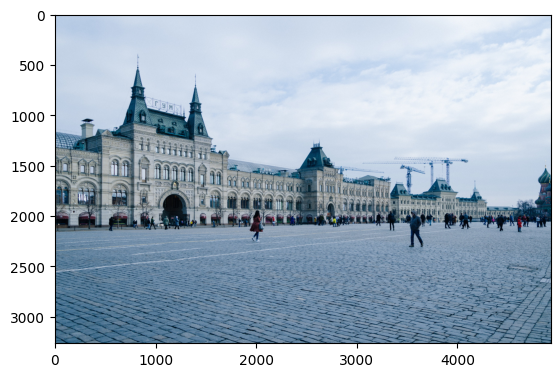

In [9]:
img = plt.imread("Image.jpeg")
Nx, Ny, Nz = np.shape(img)
print(f"Height: {Nx}, Width: {Ny}, RGB: {Nz}")
plt.imshow(img)
plt.show()

In [14]:
print(img)

[[[182 202 227]
  [172 192 217]
  [174 194 219]
  ...
  [216 229 246]
  [206 219 236]
  [196 209 226]]

 [[189 209 234]
  [179 199 224]
  [179 199 224]
  ...
  [213 226 243]
  [211 224 241]
  [210 223 240]]

 [[191 211 236]
  [182 202 227]
  [180 200 225]
  ...
  [208 221 238]
  [214 227 244]
  [219 232 249]]

 ...

 [[ 60 107 137]
  [ 59 106 136]
  [ 63 110 140]
  ...
  [ 57  89 110]
  [ 59  91 116]
  [ 57  89 114]]

 [[ 60 107 137]
  [ 58 105 135]
  [ 60 105 136]
  ...
  [ 59  91 112]
  [ 59  89 115]
  [ 55  85 111]]

 [[ 61 108 138]
  [ 57 104 134]
  [ 57 102 133]
  ...
  [ 45  77  98]
  [ 54  81 108]
  [ 57  84 111]]]


## **The RGB Channels**

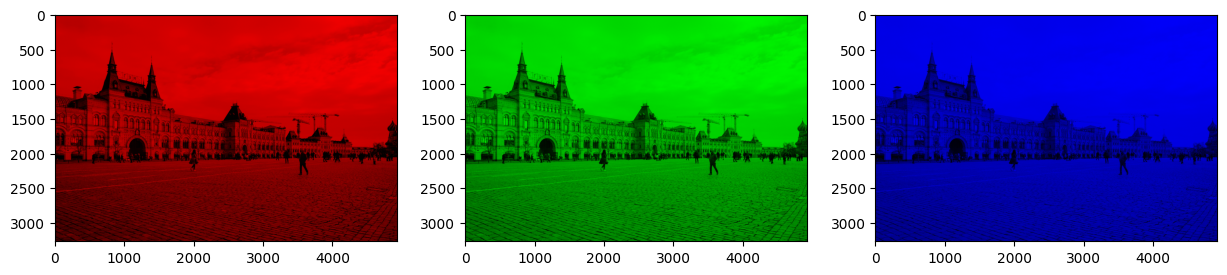

In [13]:
imgR, imgG, imgB = img.copy(), img.copy(), img.copy()
imgR[:, :, (1, 2)] = 0
imgG[:, :, (0, 2)] = 0
imgB[:, :, (0, 1)] = 0
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 15))
ax[0].imshow(imgR)
ax[1].imshow(imgG)
ax[2].imshow(imgB)
plt.show()

## **The Grayscale Image**

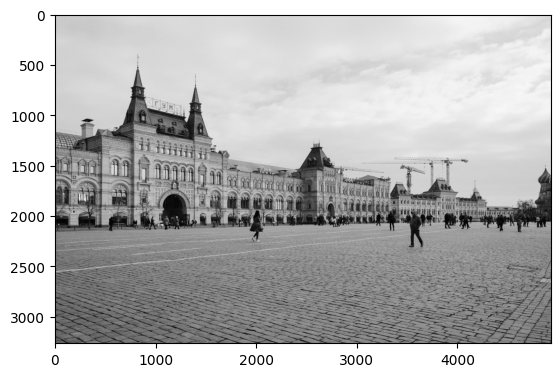

In [18]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img, rgb_weights)
plt.imshow(grayscale_image, cmap = "gray")
plt.show()

In [22]:
print(np.shape(grayscale_image))
print(grayscale_image)

(3264, 4928)
[[198.8518 188.8528 190.8526 ... 227.0294 217.0304 207.0314]
 [205.8511 195.8521 195.8521 ... 224.0297 222.0299 221.03  ]
 [207.8509 198.8518 196.852  ... 219.0302 225.0296 230.0291]
 ...
 [ 96.361   95.3611  99.3607 ...  81.8203  84.2761  82.2763]
 [ 96.361   94.3612  95.073  ...  83.8201  82.9881  78.9885]
 [ 97.3609  93.3613  92.0733 ...  69.8215  75.9996  78.9993]]


## **Sobel Operators - The Edge-detecting Kernels**

$G_x = \begin{bmatrix}1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix}$ and $G_y = \begin{bmatrix}1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

In [21]:
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

## **Implementing the 2d Convolution**
$A = \begin{bmatrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$
when zero padded by 1 pixel gives:
$A' = \begin{bmatrix}0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 2 & 3 & 0 \\ 0 & 4 & 5 & 6 & 0 \\ 0 & 7 & 8 & 9 & 0 \\ 0 & 0 & 0 & 0 & 0\end{bmatrix}$ <br>
This is achieved using the NumPy's **.pad()** function.

```python
A_padded = np.pad(A, padding = 1, mode = "constant")
```

Also before proceeding with the convolution, the kernel must be **flipped Left-Right** and then **Upside-Down** <br>
$ker = \begin{bmatrix}a & b & c \\ d & e & f \\ g & h & i \end{bmatrix} ⟶ \begin{bmatrix}c & b & a \\ f & e & d \\ i & h & g \end{bmatrix} ⟶ \begin{bmatrix}i & h & g \\ f & e & d \\ c & b & a \end{bmatrix} = ker'$ <br>

This is achieved as:

```python
ker_flipped = np.flipud(np.fliplr(ker))
```

**fliplr** denoting a left-right flip and **flipud** denoting a up-down flip.
Choose a **stride** of length 1 and perform the convolution as the dot product of kernel sized chunks of $A$ with the $ker$:

$\begin{bmatrix}0 & 0 & 0 \\ 0 & 1 & 2 \\ 0 & 4 & 5 \end{bmatrix} \cdot \begin{bmatrix}i & h & g \\ f & e & d \\ c & b & a \end{bmatrix} = elt_1$ <br><br>
$\begin{bmatrix}0 & 0 & 0 \\ 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} \cdot \begin{bmatrix}i & h & g \\ f & e & d \\ c & b & a \end{bmatrix} = elt_2$ <br>
$\vdots$ <br>

$\begin{bmatrix}5 & 6 & 0 \\ 8 & 9 & 0 \\ 0 & 0 & 0 \end{bmatrix} \cdot \begin{bmatrix}i & h & g \\ f & e & d \\ c & b & a \end{bmatrix} = elt_N$ <br><br>
Notice the dimensions of the final output matrix:

\begin{equation}
R_{\text{height}} = \frac{A_{\text{height}} + 2\cdot\text{padding} - ker_{\text{height}}}{\text{stride}} + 1
\end{equation}

\begin{equation}
R_{\text{width}} = \frac{A_{\text{width}} + 2\cdot\text{padding} - ker_{\text{width}}}{\text{stride}} + 1
\end{equation}


In [37]:
print(Gx); print()
print(np.fliplr(Gx)); print()
print(np.flipud(Gx))

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]


In [38]:
def convolve2d(image, kernel, padding, stride):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = (image_height + 2 * padding - kernel_height) // stride + 1
    output_width = (image_width + 2 * padding - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width))

    padded_image = np.pad(image, padding, mode = "constant")
    kernel = np.flipud(np.fliplr(kernel))

    for i in range(0, output_height, stride):
        for j in range(0, output_width, stride):
            output[i, j] = np.sum(padded_image[i : i + kernel_height, j : j+kernel_width] * kernel)

    return output

In [ ]:
imgX = convolve2d(grayscale_image, Gx, 1, 1)
imgY = convolve2d(grayscale_image, Gy, 1, 1)

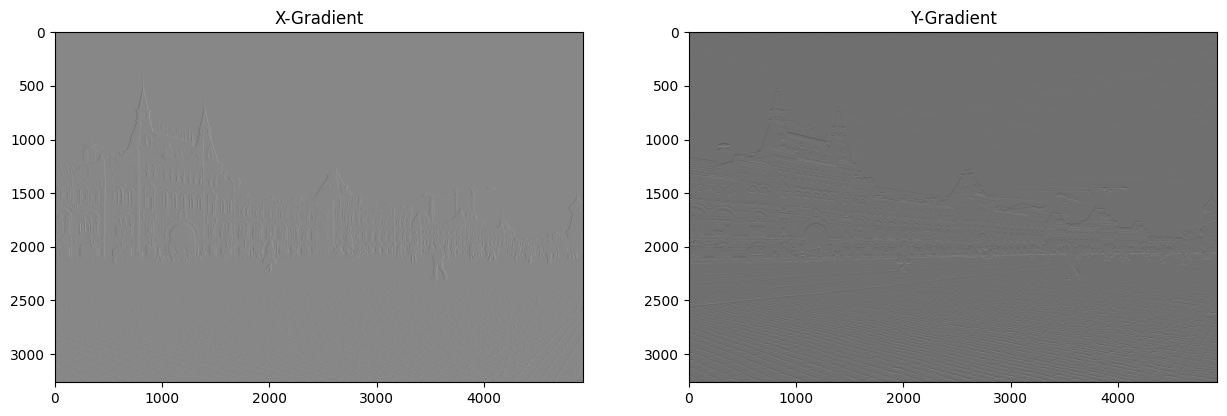

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 15))
ax[0].imshow(imgX, cmap = "gray")
ax[0].set_title("X-Gradient")
ax[1].imshow(imgY, cmap = "gray")
ax[1].set_title("Y-Gradient")
plt.show()

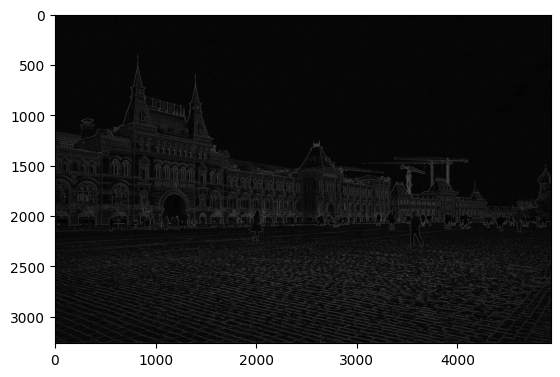

In [28]:
sobel_final = np.sqrt(imgX**2 + imgY**2)
plt.imshow(sobel_final, cmap = "gray")
plt.show()

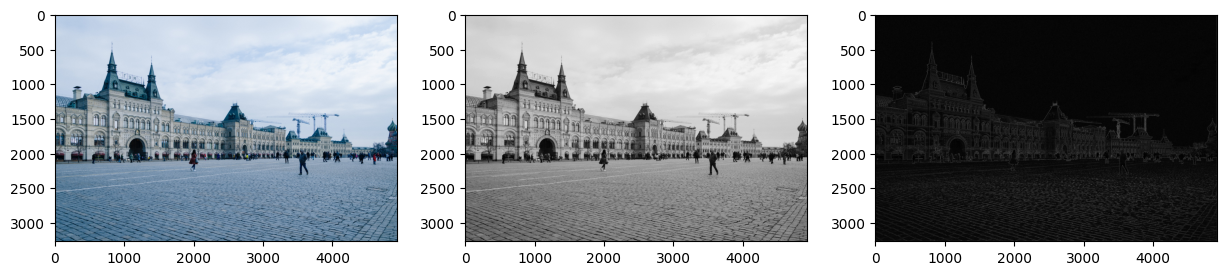

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 15))
ax[0].imshow(img)
ax[1].imshow(grayscale_image, cmap = "gray")
ax[2].imshow(sobel_final, cmap = "gray")
plt.show()

In [40]:
plt.imsave("Sobel.jpeg", sobel_final, cmap = "gray")

## **Wrapped Up Function**

In [45]:
def edge_detect(image_org):
    padding, stride = 1, 1

    rgb_weights = [0.2989, 0.5870, 0.1140]
    image = np.dot(image_org, rgb_weights)

    Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
    Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

    image_height, image_width = image.shape

    output_height = (image_height + 2 * padding - 3) // stride + 1
    output_width = (image_width + 2 * padding - 3) // stride + 1
    A_sobel = np.zeros((output_height, output_width))

    padded_image = np.pad(image, padding, mode = "constant")
    Gx = np.flipud(np.fliplr(Gx))
    Gy = np.flipud(np.fliplr(Gy))

    for i in range(0, output_height, stride):
        for j in range(0, output_width, stride):
            A_sobel[i, j] = (np.sum(padded_image[i : i + 3, j : j + 3] * Gx)**2 + np.sum(padded_image[i : i + 3, j : j + 3] * Gy)**2)**0.5

    plt.imsave("Edge.jpeg", A_sobel, cmap = "gray")
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 15))
    ax[0].imshow(image_org)
    ax[0].set_title("Original Image")
    ax[1].imshow(A_sobel, cmap = "gray")
    ax[1].set_title("Edge-Detected")
    plt.show()

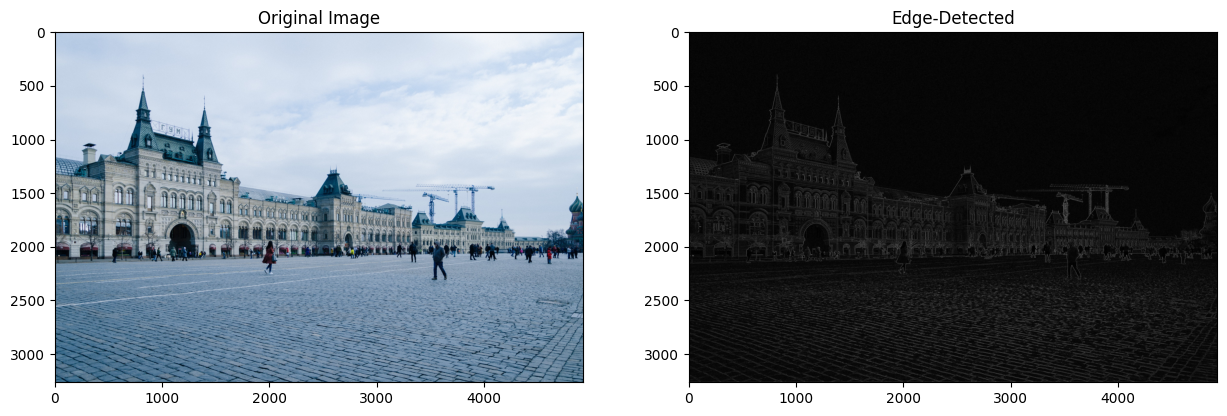

In [46]:
edge_detect(img)